In [46]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [196]:
voltajes= [0.016,0.018,0.020,0.022,0.024,0.026,0.028,0.030,0.035,0.040,0.045,0]
#voltajes= [0.016,0.018,0.020,0.040,0]
print(voltajes)

[0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.035, 0.04, 0.045, 0]


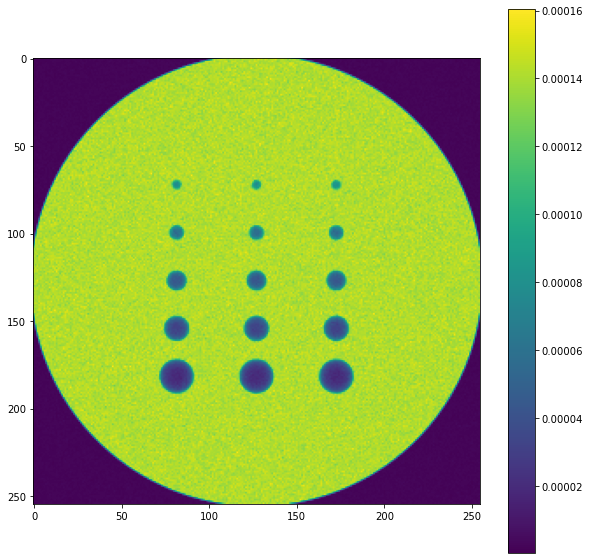

In [19]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
#imagen_GATE_dosis = ct_scans[0]+0.00000000001
imagen_GATE_dosis = ct_scans[0]
#ct_scansBase = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFileBase80-2-Dose.mhd' , sitk.sitkFloat32))
#imagen_GATE_dosisBase = ct_scansBase[0]

#imagen_GATE_dosis= imagen_GATE_dosisBase/imagen_GATE_dosis
#imagen_GATE_dosis= imagen_GATE_dosis/np.max(imagen_GATE_dosis)
#imagen_GATE_dosis= imagen_GATE_dosisBase
#imagen_GATE_dosis= imagen_GATE_dosis<1

fig = plt.figure(figsize=(10,10))
plt.imshow(imagen_GATE_dosis,cmap='viridis')
plt.colorbar()

In [57]:
#Obtener los indices para los pixeles de interes


In [34]:
import SimpleITK as sitk
import numpy as np
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)

    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing


In [36]:
ct_scan, origin,spacing =load_itk('MyOutputFile80-0-Dose.mhd')

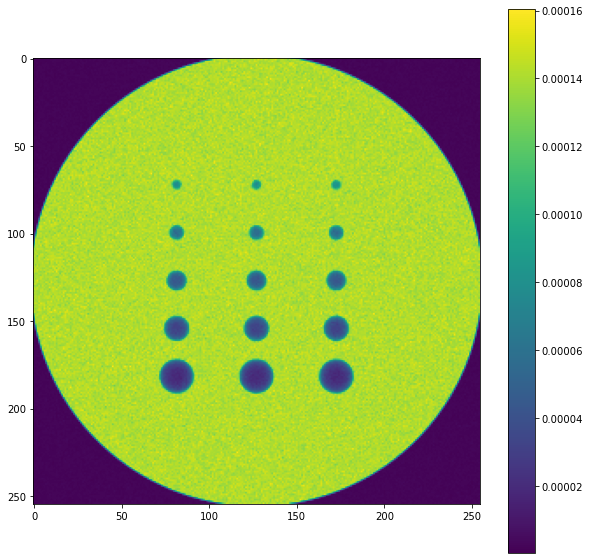

In [45]:
fig = plt.figure(figsize=(10,10))
plt.imshow(ct_scan[0] ,cmap='viridis')
plt.colorbar()

In [60]:
np.savetxt("foo.txt", ct_scan[0], delimiter=",")

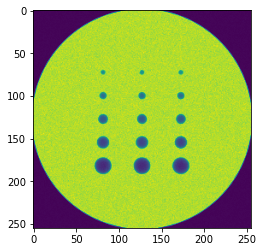

In [61]:
data = pd.read_csv('foo.txt',sep=',',header=None)
data = pd.DataFrame(data)
plt.imshow(data,cmap='viridis')

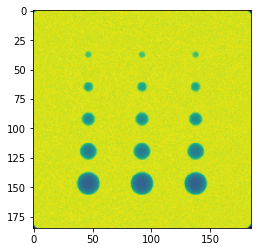

In [288]:
plt.imshow(ct_scan[0][35:220, 35:220],cmap='viridis')

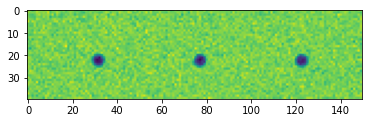

In [82]:
plt.imshow(ct_scan[0][50:90, 50:200],cmap='viridis')

In [90]:
rows_roi= np.linspace(50,90, 90-50+1)
cols_roi= np.linspace(50,200, 200-50+1)
region_of_interest= ct_scan[0][50:90, 50:200]
rows_roi= 90-50
cols_roi= 200-50
print(rows_roi, cols_roi)

40 150


In [131]:
i_index= []
j_index= []
signal_indices=[]
for j in range(cols_roi):
    for i in range(rows_roi):
        if (region_of_interest[i,j] < ct_scan[0][50:200,50:200].mean() - 2*ct_scan[0][50:200,50:200].std()):
            i_index.append(i)
            j_index.append(j)
            signal_indices.append([i,j])

In [178]:
#print(signal_indices)
signalColumn=np.column_stack(([i_index,j_index]))
region_of_interest= ct_scan[0][50:90, 50:200]
signal= region_of_interest[i_index,j_index]
bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)

#bg_wo_signal_no_borders =np.delete(region_of_interest, signalColumn)

In [179]:
#arr_bg=np.array([region_of_interest[i,j] for i,j in bg_wo_signal_no_borders])
#arr_signal=np.array([region_of_interest[i] for i in signal_indices])

In [180]:
#arr_bg=np.array()
#arr_signal=np.array()
arr_bg= bg_wo_signal_no_borders.flatten(order='C')
arr_signal=signal.flatten(order='C')

In [181]:
print(arr_bg)
print('array bg')
print(arr_signal)
print('array signal')

[0.000148   0.00014421 0.00013002 ... 0.00013985 0.00013912 0.00014366]
array bg
[8.1358994e-05 7.5774529e-05 7.8210433e-05 7.7327073e-05 7.8933765e-05
 7.9079822e-05 7.4429605e-05 8.0974743e-05 8.0956226e-05 8.0844366e-05]
array signal


In [185]:
CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
print(CNR)

8.952022


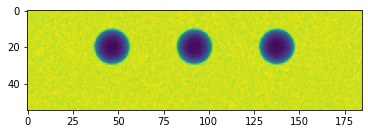

In [352]:
ct_scan, origin,spacing =load_itk('MyOutputFile80-2-Dose.mhd')
region = ct_scan[0][35:220, 35:220]
plt.imshow(region[127:182,:],cmap='viridis')

In [375]:
def sacar_CNRs1(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 60
    cols_roi= 220-35
    for k in range(len(VoltajesCorre)):
        #i_index= []
        #j_index= []
        #signal_indices=[]
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][35:220, 35:220]
        region_of_interest= region[0:60,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] <region.mean() - 1*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)
        arr_bg= bg_wo_signal_no_borders.flatten(order='C')
        arr_signal=signal.flatten(order='C')
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs2(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 40
    cols_roi= 220-35
    for k in range(len(VoltajesCorre)):
        #i_index= []
        #j_index= []
        #signal_indices=[]
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][35:220, 35:220]
        region_of_interest= region[40:80,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] <region.mean() - 1*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)
        arr_bg= bg_wo_signal_no_borders.flatten(order='C')
        arr_signal=signal.flatten(order='C')
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs3(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi=40
    cols_roi= 220-35
    for k in range(len(VoltajesCorre)):
        #i_index= []
        #j_index= []
        #signal_indices=[]
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][35:220, 35:220]
        region_of_interest= region[70:110,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] <region.mean() - 1*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)
        arr_bg= bg_wo_signal_no_borders.flatten(order='C')
        arr_signal=signal.flatten(order='C')
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs4(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi=35
    cols_roi= 220-35
    for k in range(len(VoltajesCorre)):
        #i_index= []
        #j_index= []
        #signal_indices=[]
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][35:220, 35:220]
        region_of_interest= region[100:135,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] <region.mean() - 1*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)
        arr_bg= bg_wo_signal_no_borders.flatten(order='C')
        arr_signal=signal.flatten(order='C')
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRs5(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 182-127
    cols_roi= 220-35
    for k in range(len(VoltajesCorre)):
        #i_index= []
        #j_index= []
        #signal_indices=[]
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][35:220, 35:220]
        region_of_interest= region[127:1-3,:]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] <region.mean() - 1*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)
        arr_bg= bg_wo_signal_no_borders.flatten(order='C')
        arr_signal=signal.flatten(order='C')
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

def sacar_CNRsG(voltajes):
    CNRs=[]
    i_index= []
    j_index= []
    signal_indices=[]
    rows_roi= 220-35
    cols_roi= 220-35
    for k in range(len(VoltajesCorre)):
        #i_index= []
        #j_index= []
        #signal_indices=[]
        ct_scan = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-%d-Dose.mhd' %k , sitk.sitkFloat32))
        region = ct_scan[0][35:220, 35:220]
        region_of_interest= region[:,:]
        #region_of_interest= ct_scan[0]
        
        for j in range(cols_roi):
            for i in range(rows_roi):
                    if (region_of_interest[i,j] <region.mean() - 1*region.std()):
                        i_index.append(i)
                        j_index.append(j)
                        signal_indices.append([i,j])
                        
        signal= region_of_interest[i_index,j_index]
        bg_wo_signal_no_borders =np.delete(region_of_interest, signal_indices)
        arr_bg= bg_wo_signal_no_borders.flatten(order='C')
        arr_signal=signal.flatten(order='C')
        CNR=np.abs(arr_signal.mean()-arr_bg.mean())/arr_bg.std(ddof=0)
        CNRs.append(CNR)
    return CNRs

In [376]:
VoltajesCorre= [16,18,20,22,24,26,28,30,35,40,45]
print(len(VoltajesCorre))
CNR1s= sacar_CNRs1(VoltajesCorre)
CNR2s= sacar_CNRs2(VoltajesCorre)
CNR3s= sacar_CNRs3(VoltajesCorre)
CNR4s= sacar_CNRs4(VoltajesCorre)
CNR5s= sacar_CNRs5(VoltajesCorre)
CNRGene= sacar_CNRsG(VoltajesCorre)

11


In [372]:
#CNRGene= sacar_CNRsG(VoltajesCorre)

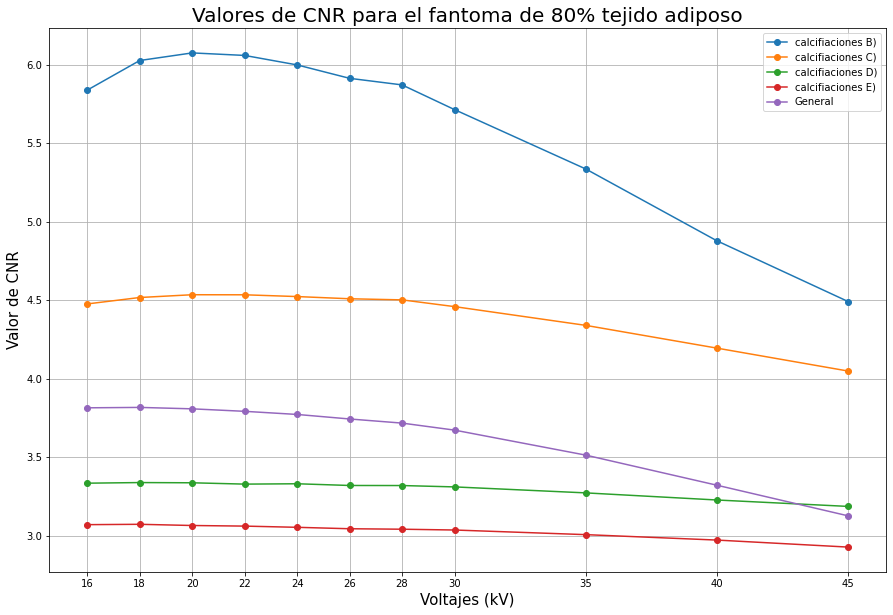

In [402]:
fig = plt.figure(figsize=(15,10))
#plt.plot(VoltajesCorre,CNR1s, 'o-', label='calcifiaciones A)')
plt.plot(VoltajesCorre,CNR2s, 'o-', label='calcifiaciones B)')
plt.plot(VoltajesCorre,CNR3s, 'o-', label='calcifiaciones C)')
plt.plot(VoltajesCorre,CNR4s, 'o-', label='calcifiaciones D)')
plt.plot(VoltajesCorre,CNR5s, 'o-', label='calcifiaciones E)')
plt.plot(VoltajesCorre,CNRGene, 'o-', label='General')
plt.xlabel('Voltajes (kV)', fontsize= 15)
plt.ylabel('Valor de CNR', fontsize= 15)
plt.xticks(VoltajesCorre, VoltajesCorre )
plt.title('Valores de CNR para el fantoma de 80% tejido adiposo', fontsize= 20)
plt.grid()
plt.legend()
plt.savefig('CNRs.png')

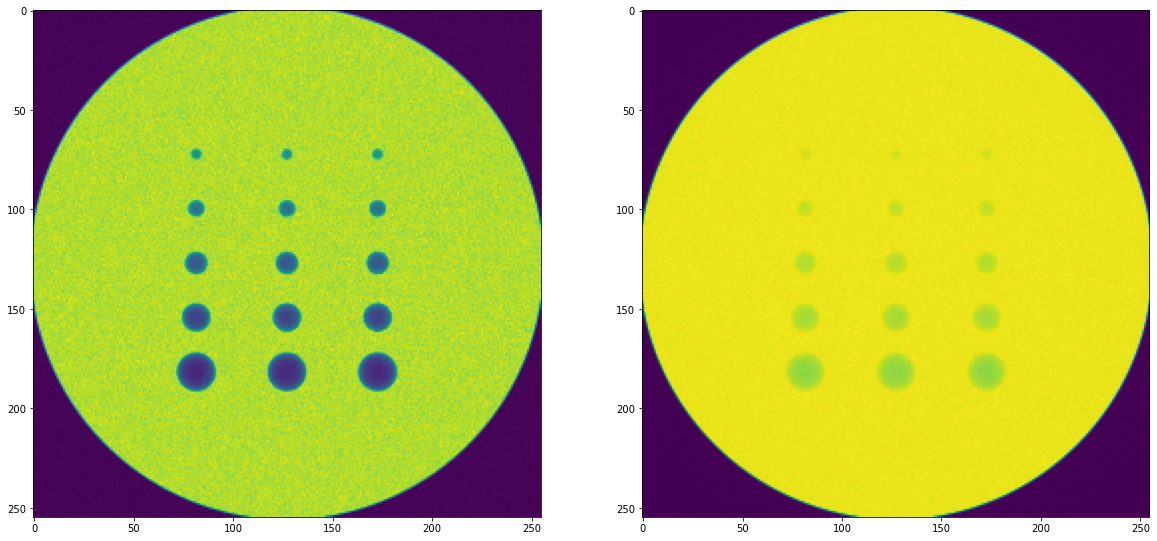

In [370]:
fig, ax = plt.subplots(1,2, figsize=(20,20))
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-0-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis = ct_scans[0]
ct_scans2 = sitk.GetArrayFromImage(sitk.ReadImage('MyOutputFile80-10-Dose.mhd', sitk.sitkFloat32))
imagen_GATE_dosis2 = ct_scans2[0]

ax[0].imshow(imagen_GATE_dosis,cmap='viridis')
ax[1].imshow(imagen_GATE_dosis2,cmap='viridis')